In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re #Regular Expressions
import string #importing string functions
import nltk
import warnings
warnings.filterwarnings('ignore')

import plotly.express as px
import seaborn as sns
import datetime as dt
import warnings
import plotly.graph_objects as go
pd.set_option('display.max_columns',None)
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, roc_auc_score,roc_curve,auc, precision_score,recall_score
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, roc_auc_score,roc_curve,auc

In [ ]:
df = pd.read_csv('Amazon Sale Report.csv',index_col = 'index')
df

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
index,,,,,,,,,,,,,,,,,,,,,,,
0,405-8078784-5731545,4/30/2022,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,NaN,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,171-9198151-1101146,4/30/2022,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,404-0687676-7273146,4/30/2022,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,403-9615377-8133951,4/30/2022,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,NaN,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,407-1069790-7240320,4/30/2022,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128970,406-6001380-7673107,5/31/2022,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-XL,kurta,XL,B098112V2V,Shipped,1,INR,517.00,HYDERABAD,TELANGANA,500013.0,IN,NaN,False,NaN,False
128971,402-9551604-7544318,5/31/2022,Shipped,Amazon,Amazon.in,Expedited,SET401,SET401-KR-NP-M,Set,M,B09VC6KHX8,Shipped,1,INR,999.00,GURUGRAM,HARYANA,122004.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False
128972,407-9547469-3152358,5/31/2022,Shipped,Amazon,Amazon.in,Expedited,J0157,J0157-DR-XXL,Western Dress,XXL,B0982YZ51B,Shipped,1,INR,690.00,HYDERABAD,TELANGANA,500049.0,IN,NaN,False,NaN,False


In [ ]:
df['Amount'].sum().round(1)

78592678.3

In [ ]:
df['Amount'].max()

5584.0

In [ ]:
df['Order ID'].duplicated().sum()

8597

In [ ]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 128975 entries, 0 to 128974
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Order ID            128975 non-null  object 
 1   Date                128975 non-null  object 
 2   Status              128975 non-null  object 
 3   Fulfilment          128975 non-null  object 
 4   Sales Channel       128975 non-null  object 
 5   ship-service-level  128975 non-null  object 
 6   Style               128975 non-null  object 
 7   SKU                 128975 non-null  object 
 8   Category            128975 non-null  object 
 9   Size                128975 non-null  object 
 10  ASIN                128975 non-null  object 
 11  Courier Status      122103 non-null  object 
 12  Qty                 128975 non-null  int64  
 13  currency            121180 non-null  object 
 14  Amount              121180 non-null  float64
 15  ship-city           128942 non-null  ob

In [ ]:
df.shape

(128975, 23)

In [ ]:
df.drop_duplicates('Order ID',inplace=True)

In [ ]:
df.isnull().sum()/128975

Order ID              0.000000
Date                  0.000000
Status                0.000000
Fulfilment            0.000000
Sales Channel         0.000000
ship-service-level    0.000000
Style                 0.000000
SKU                   0.000000
Category              0.000000
Size                  0.000000
ASIN                  0.000000
Courier Status        0.049521
Qty                   0.000000
currency              0.057383
Amount                0.057383
ship-city             0.000217
ship-state            0.000217
ship-postal-code      0.000217
ship-country          0.000217
promotion-ids         0.363846
B2B                   0.000000
fulfilled-by          0.651305
Unnamed: 22           0.355418
dtype: float64

In [ ]:
df.columns
df.apply(pd.unique)

Order ID              [405-8078784-5731545, 171-9198151-1101146, 404...
Date                  [4/30/2022, 4/29/2022, 4/28/2022, 4/27/2022, 4...
Status                [Cancelled, Shipped - Delivered to Buyer, Ship...
Fulfilment                                           [Merchant, Amazon]
Sales Channel                                   [Amazon.in, Non-Amazon]
ship-service-level                                [Standard, Expedited]
Style                 [SET389, JNE3781, JNE3371, J0341, JNE3671, SET...
SKU                   [SET389-KR-NP-S, JNE3781-KR-XXXL, JNE3371-KR-X...
Category              [Set, kurta, Western Dress, Top, Ethnic Dress,...
Size                   [S, 3XL, XL, L, XXL, XS, 6XL, M, 4XL, 5XL, Free]
ASIN                  [B09KXVBD7Z, B09K3WFS32, B07WV4JV4D, B099NRCT7...
Courier Status                     [nan, Shipped, Cancelled, Unshipped]
Qty                                       [0, 1, 2, 15, 3, 9, 13, 5, 4]
currency                                                     [IN

In [ ]:
df=df.drop(['fulfilled-by','Unnamed: 22','promotion-ids'], axis=1) # Specify axis=1 to drop columns, and remove extra space

In [ ]:
df.loc[(df.Amount == 0)&(df.Qty==0)]

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B
index,,,,,,,,,,,,,,,,,,,,


In [ ]:
ds_null_currency=df.loc[df.currency.isnull()]
ds_null_currency

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B
index,,,,,,,,,,,,,,,,,,,,
8,407-5443024-5233168,4/30/2022,Cancelled,Amazon,Amazon.in,Expedited,SET200,SET200-KR-NP-A-XXXL,Set,3XL,B08L91ZZXN,Cancelled,0,NaN,NaN,HYDERABAD,TELANGANA,500008.0,IN,False
29,404-5933402-8801952,4/30/2022,Cancelled,Merchant,Amazon.in,Standard,JNE2132,JNE2132-KR-398-XXXL,kurta,3XL,B07JG3CND8,NaN,0,NaN,NaN,GUWAHATI,ASSAM,781003.0,IN,False
65,171-4137548-0481151,4/30/2022,Cancelled,Amazon,Amazon.in,Expedited,JNE3373,JNE3373-KR-XXL,kurta,XXL,B082W8RWN1,Cancelled,0,NaN,NaN,Dahod,Gujarat,389151.0,IN,False
84,403-9950518-0349133,4/30/2022,Cancelled,Amazon,Amazon.in,Expedited,JNE3510,JNE3510-KR-M,kurta,M,B08WPR5MCB,Cancelled,0,NaN,NaN,HYDERABAD,TELANGANA,500072.0,IN,False
95,405-9112089-3379536,4/30/2022,Cancelled,Amazon,Amazon.in,Expedited,JNE3405,JNE3405-KR-L,kurta,L,B081WSCKPQ,Cancelled,0,NaN,NaN,PUNE,MAHARASHTRA,411046.0,IN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128902,406-4220789-1106743,5/31/2022,Cancelled,Amazon,Amazon.in,Expedited,JNE3798,JNE3798-KR-L,Western Dress,L,B09SDX13G7,Cancelled,0,NaN,NaN,ANANTAPUR,ANDHRA PRADESH,515001.0,IN,False
128903,406-3923120-4345139,5/31/2022,Cancelled,Amazon,Amazon.in,Expedited,JNE3801,JNE3801-KR-M,kurta,M,B09SDZ4FH9,Cancelled,0,NaN,NaN,ANANTAPUR,ANDHRA PRADESH,515001.0,IN,False
128907,403-6757403-6097100,5/31/2022,Cancelled,Amazon,Amazon.in,Expedited,NW014,NW014-ST-SR-XXXL,Set,3XL,B0928ZT74Y,Cancelled,0,NaN,NaN,GREATER NOIDA,UTTAR PRADESH,201306.0,IN,False


In [ ]:
nonA =df.loc [df['Sales Channel ']=='Non-Amazon']
nonA

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B
index,,,,,,,,,,,,,,,,,,,,
937,S02-5278980-4327051,4/30/2022,Shipped,Amazon,Non-Amazon,Standard,BL017,BL017-63BLACK,Blouse,Free,B077Z7WDXN,Unshipped,15,NaN,NaN,Surat,Gujarat,394210.0,IN,False
1057,S02-9107114-0460608,4/30/2022,Shipped,Amazon,Non-Amazon,Standard,SET315,SET315-KR-PP-XL,Set,XL,B09RKDN6S4,Unshipped,2,NaN,NaN,Surat,Gujarat,394210.0,IN,False
3631,S02-1006261-5356758,4/28/2022,Shipped,Amazon,Non-Amazon,Standard,JNE2305,JNE2305-KR-533-L,kurta,L,B07GRSCXCP,Unshipped,9,NaN,NaN,Surat,Gujarat,394210.0,IN,False
3632,S02-3681731-6111841,4/28/2022,Shipped,Amazon,Non-Amazon,Standard,JNE2058,JNE2058-KR-339-L,kurta,L,B075ZTMFJX,Unshipped,1,NaN,NaN,Surat,Gujarat,394210.0,IN,False
3634,S02-1926028-4838217,4/28/2022,Shipped,Amazon,Non-Amazon,Standard,JNE3311,JNE3311-KR-A-XS,kurta,XS,B07XJ15Q1S,Unshipped,1,NaN,NaN,Surat,Gujarat,394210.0,IN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118099,S02-9176732-4357939,6/8/2022,Shipped,Amazon,Non-Amazon,Standard,J0014,J0014-LCD-M,Set,M,B0894XW4QF,Unshipped,1,NaN,NaN,Surat,Gujarat,394210.0,IN,False
124616,S02-2059602-9568060,6/4/2022,Shipped,Amazon,Non-Amazon,Standard,JNE3577,JNE3577-KR-S,kurta,S,B08MYV4CHS,Unshipped,1,NaN,NaN,Surat,Gujarat,394210.0,IN,False
124617,S02-3811761-8377519,6/4/2022,Shipped,Amazon,Non-Amazon,Standard,J0103,J0103-SKD-XS,Set,XS,B08VWKSVV7,Unshipped,2,NaN,NaN,Surat,Gujarat,394210.0,IN,False


In [ ]:
full2=pd.concat([df, nonA], axis=0)
full2

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B
index,,,,,,,,,,,,,,,,,,,,
0,405-8078784-5731545,4/30/2022,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,NaN,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False
1,171-9198151-1101146,4/30/2022,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False
2,404-0687676-7273146,4/30/2022,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True
3,403-9615377-8133951,4/30/2022,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,NaN,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False
4,407-1069790-7240320,4/30/2022,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118099,S02-9176732-4357939,6/8/2022,Shipped,Amazon,Non-Amazon,Standard,J0014,J0014-LCD-M,Set,M,B0894XW4QF,Unshipped,1,NaN,NaN,Surat,Gujarat,394210.0,IN,False
124616,S02-2059602-9568060,6/4/2022,Shipped,Amazon,Non-Amazon,Standard,JNE3577,JNE3577-KR-S,kurta,S,B08MYV4CHS,Unshipped,1,NaN,NaN,Surat,Gujarat,394210.0,IN,False
124617,S02-3811761-8377519,6/4/2022,Shipped,Amazon,Non-Amazon,Standard,J0103,J0103-SKD-XS,Set,XS,B08VWKSVV7,Unshipped,2,NaN,NaN,Surat,Gujarat,394210.0,IN,False


<Axes: xlabel='count', ylabel='Sales Channel '>

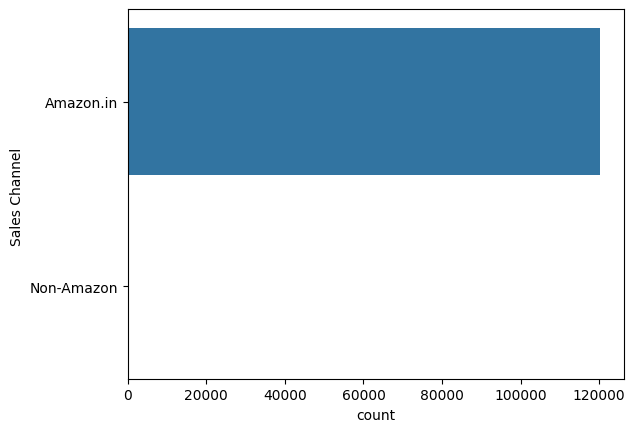

In [ ]:
sns.countplot(y=full2['Sales Channel '])

In [ ]:
df=df.dropna()
df.isnull().sum()

Order ID              0
Date                  0
Status                0
Fulfilment            0
Sales Channel         0
ship-service-level    0
Style                 0
SKU                   0
Category              0
Size                  0
ASIN                  0
Courier Status        0
Qty                   0
currency              0
Amount                0
ship-city             0
ship-state            0
ship-postal-code      0
ship-country          0
B2B                   0
dtype: int64

In [ ]:
df['Qty'].unique()

array([1, 2, 3, 5, 4])

In [ ]:
df['Size'] = df['Size'].astype('category')

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 108219 entries, 1 to 128974
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Order ID            108219 non-null  object        
 1   Date                108219 non-null  datetime64[ns]
 2   Status              108219 non-null  object        
 3   Fulfilment          108219 non-null  object        
 4   Sales Channel       108219 non-null  object        
 5   ship-service-level  108219 non-null  object        
 6   Style               108219 non-null  object        
 7   SKU                 108219 non-null  object        
 8   Category            108219 non-null  object        
 9   Size                108219 non-null  category      
 10  ASIN                108219 non-null  object        
 11  Courier Status      108219 non-null  object        
 12  Qty                 108219 non-null  int64         
 13  currency            108219 non-nul

In [ ]:
df.describe()

,Date,Qty,Amount,ship-postal-code
count,108219,108219.000000,108219.000000,108219.000000
mean,2022-05-12 13:39:18.717046016,1.003364,650.901598,462879.599562
min,2022-03-31 00:00:00,1.000000,0.000000,110001.000000
25%,2022-04-20 00:00:00,1.000000,449.000000,382029.500000
50%,2022-05-10 00:00:00,1.000000,612.000000,500029.000000
75%,2022-06-04 00:00:00,1.000000,788.000000,600017.000000
max,2022-06-29 00:00:00,5.000000,5495.000000,855117.000000
std,NaN,0.066514,282.859445,191842.956586


In [ ]:
df.describe(exclude=[np.number])

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,currency,ship-city,ship-state,ship-country,B2B
count,108219,108219,108219,108219,108219,108219,108219,108219,108219,108219,108219,108219,108219,108219,108219,108219,108219
unique,108219,NaN,12,2,1,2,1351,7011,9,11,7007,2,1,8496,67,1,2
top,171-9198151-1101146,NaN,Shipped,Amazon,Amazon.in,Expedited,JNE3797,JNE3797-KR-L,Set,M,B09SDXFFQ1,Shipped,INR,BENGALURU,MAHARASHTRA,IN,False
freq,1,NaN,72653,78240,108219,77326,3531,632,42306,19159,632,102157,108219,9677,18918,108219,107466
mean,NaN,2022-05-12 13:39:18.717046016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,2022-03-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,2022-04-20 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,2022-05-10 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,2022-06-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,2022-06-29 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.isnull().sum()

Order ID              0
Date                  0
Status                0
Fulfilment            0
Sales Channel         0
ship-service-level    0
Style                 0
SKU                   0
Category              0
Size                  0
ASIN                  0
Courier Status        0
Qty                   0
currency              0
Amount                0
ship-city             0
ship-state            0
ship-postal-code      0
ship-country          0
B2B                   0
dtype: int64

In [ ]:
#df.duplicated().sum()

In [ ]:
#df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(108219, 20)

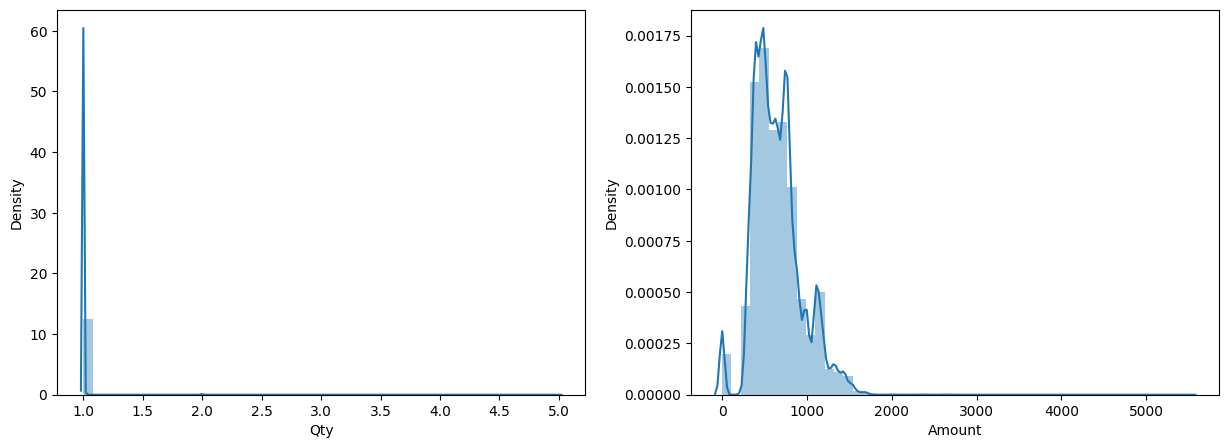

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(15,5))
sns.distplot(df['Qty'], ax=axes[0])
sns.distplot(df['Amount'], ax=axes[1])

plt.show()


In [ ]:
s1=df.Size.value_counts()
s1

Size
M       19159
L       18556
XL      17630
XXL     15293
S       14288
3XL     12366
XS       9154
6XL       624
5XL       482
4XL       358
Free      309
Name: count, dtype: int64

Text(0.5, 1.0, 'DEMAND OF CLOTHES(size)')

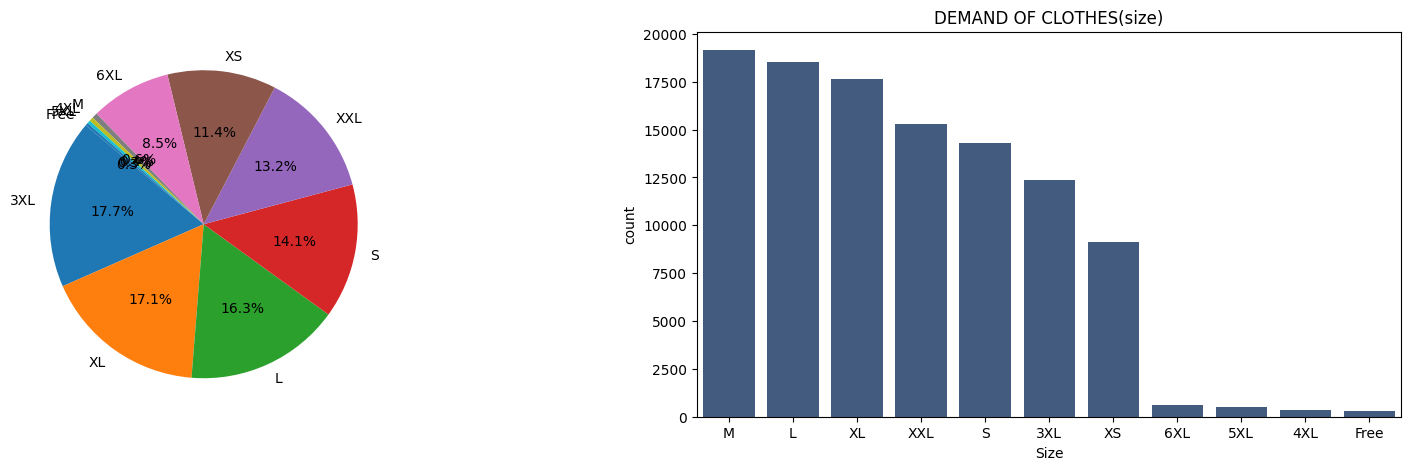

In [ ]:
lables = df['Size'].value_counts().sort_values(ascending=False)
lables2= df['Size'].unique()
order = lables.index
colors = plt.cm.Blues(np.linspace(1,2, len(lables2)))
# Plot the firstbar chart
plt.figure(figsize = [20,5])
plt.subplot(1, 2, 1)  # Create a subplot with 1 row and 2 columns, and select the first subplot
plt.pie(lables, labels=lables2, autopct='%1.1f%%', startangle=140)
plt.subplot(1, 2, 2)  # Select the second subplot
sns.countplot(x=df['Size'],alpha=0.8,palette=colors,order=order)
plt.title("DEMAND OF CLOTHES(size)")

In [ ]:
df.head(3
       )

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B
index,,,,,,,,,,,,,,,,,,,,
1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,INR,406.0,BENGALURU,KARNATAKA,560085.0,IN,False
2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,INR,329.0,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True
4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,INR,574.0,CHENNAI,TAMIL NADU,600073.0,IN,False


In [ ]:
data = df.groupby('Date', as_index=False)['Amount'].count().head(10)
data

,Date,Amount
0,2022-03-31,144
1,2022-04-01,1216
2,2022-04-02,1304
3,2022-04-03,1423
4,2022-04-04,1248
5,2022-04-05,1373
6,2022-04-06,1328
7,2022-04-07,1283
8,2022-04-08,1417
9,2022-04-09,1365


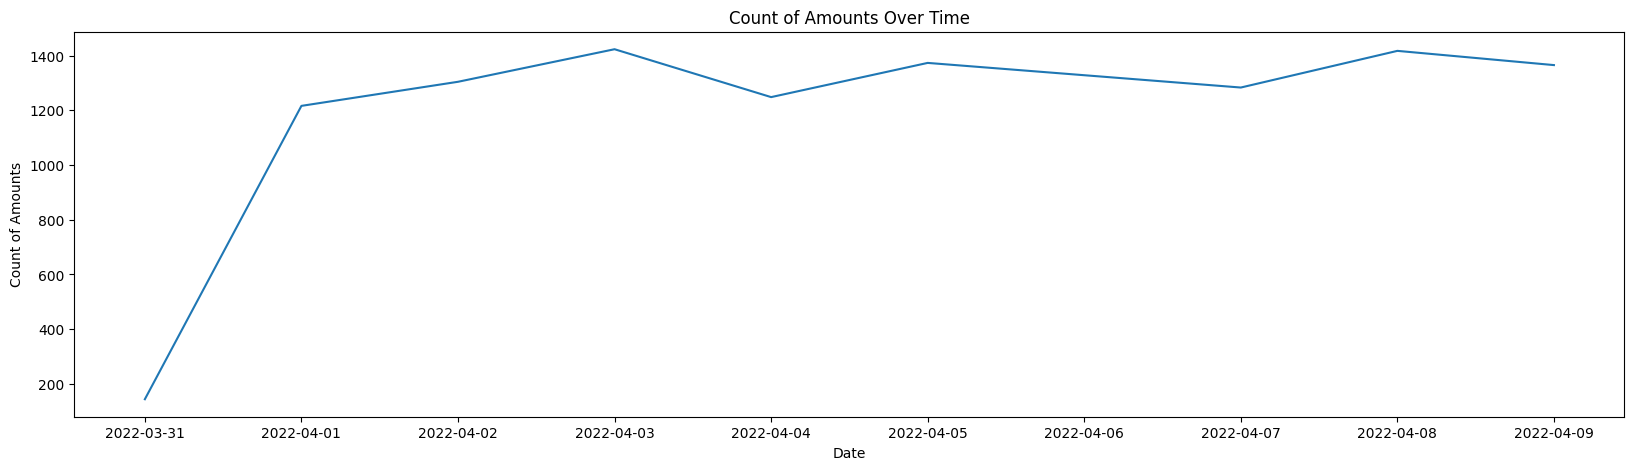

In [ ]:
fig, ax = plt.subplots(figsize=(20, 5))
# Convert 'Date' column to datetime objects if it's not already
data['Date'] = pd.to_datetime(data['Date'])
# Plot the count of amounts over time
ax.plot(data['Date'], data['Amount'])
ax.set_xlabel('Date')
ax.set_ylabel('Count of Amounts')
ax.set_title('Count of Amounts Over Time')
plt.show()

In [ ]:
df['month'] = df['Date'].dt.month

In [ ]:
data = df.groupby('month', as_index=False)['Order ID'].count().head(10)

In [ ]:
labels = data['month']
sizes = data['Order ID']

In [ ]:
sorted_indices = sizes.sort_values(ascending=False)
sorted_indices

1    41029
2    35278
3    31768
0      144
Name: Order ID, dtype: int64

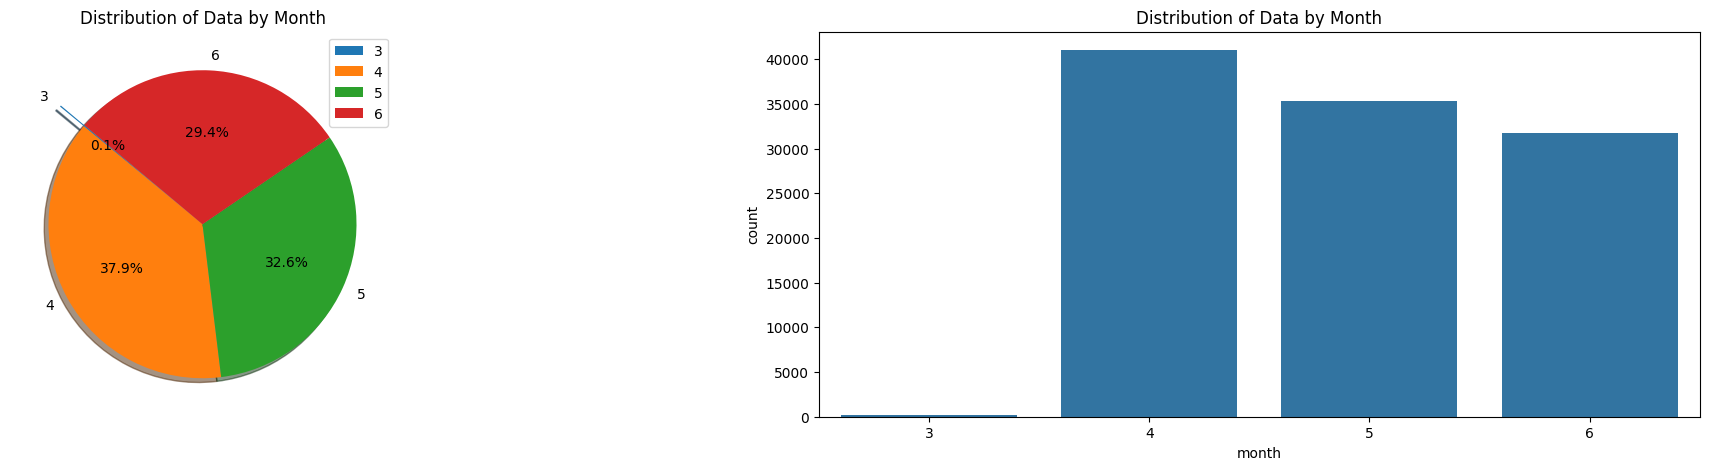

In [ ]:

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

labels = data['month']
sizes = data['Order ID']
myexplode = [0.2, 0, 0, 0]

plt.figure(figsize=(25, 5))
plt.subplot(1, 2, 1)
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140,explode = myexplode,shadow = True)
plt.title('Distribution of Data by Month')
plt.legend()
plt.subplot(1, 2, 2)
sns.countplot(x=df['month'])
plt.title("Distribution of Data by Month")
plt.show()

In [ ]:
df['Category'].value_counts()

Category
Set              42306
kurta            41158
Western Dress    13180
Top               9300
Ethnic Dress       979
Blouse             804
Bottom             364
Saree              127
Dupatta              1
Name: count, dtype: int64

In [ ]:
data2 = df.groupby(['month', 'Category']).size().reset_index(name='count').reset_index(drop=True)
data2

,month,Category,count
0,3,Blouse,1
1,3,Ethnic Dress,1
2,3,Set,63
3,3,Top,9
4,3,Western Dress,6
5,3,kurta,64
6,4,Blouse,363
7,4,Bottom,156
8,4,Ethnic Dress,294
9,4,Saree,53


        Category  count
0         Blouse      1
1   Ethnic Dress      1
2            Set     63
3            Top      9
4  Western Dress      6
5          kurta     64


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Blouse'),
  Text(1, 0, 'Ethnic Dress'),
  Text(2, 0, 'Set'),
  Text(3, 0, 'Top'),
  Text(4, 0, 'Western Dress'),
  Text(5, 0, 'kurta')])

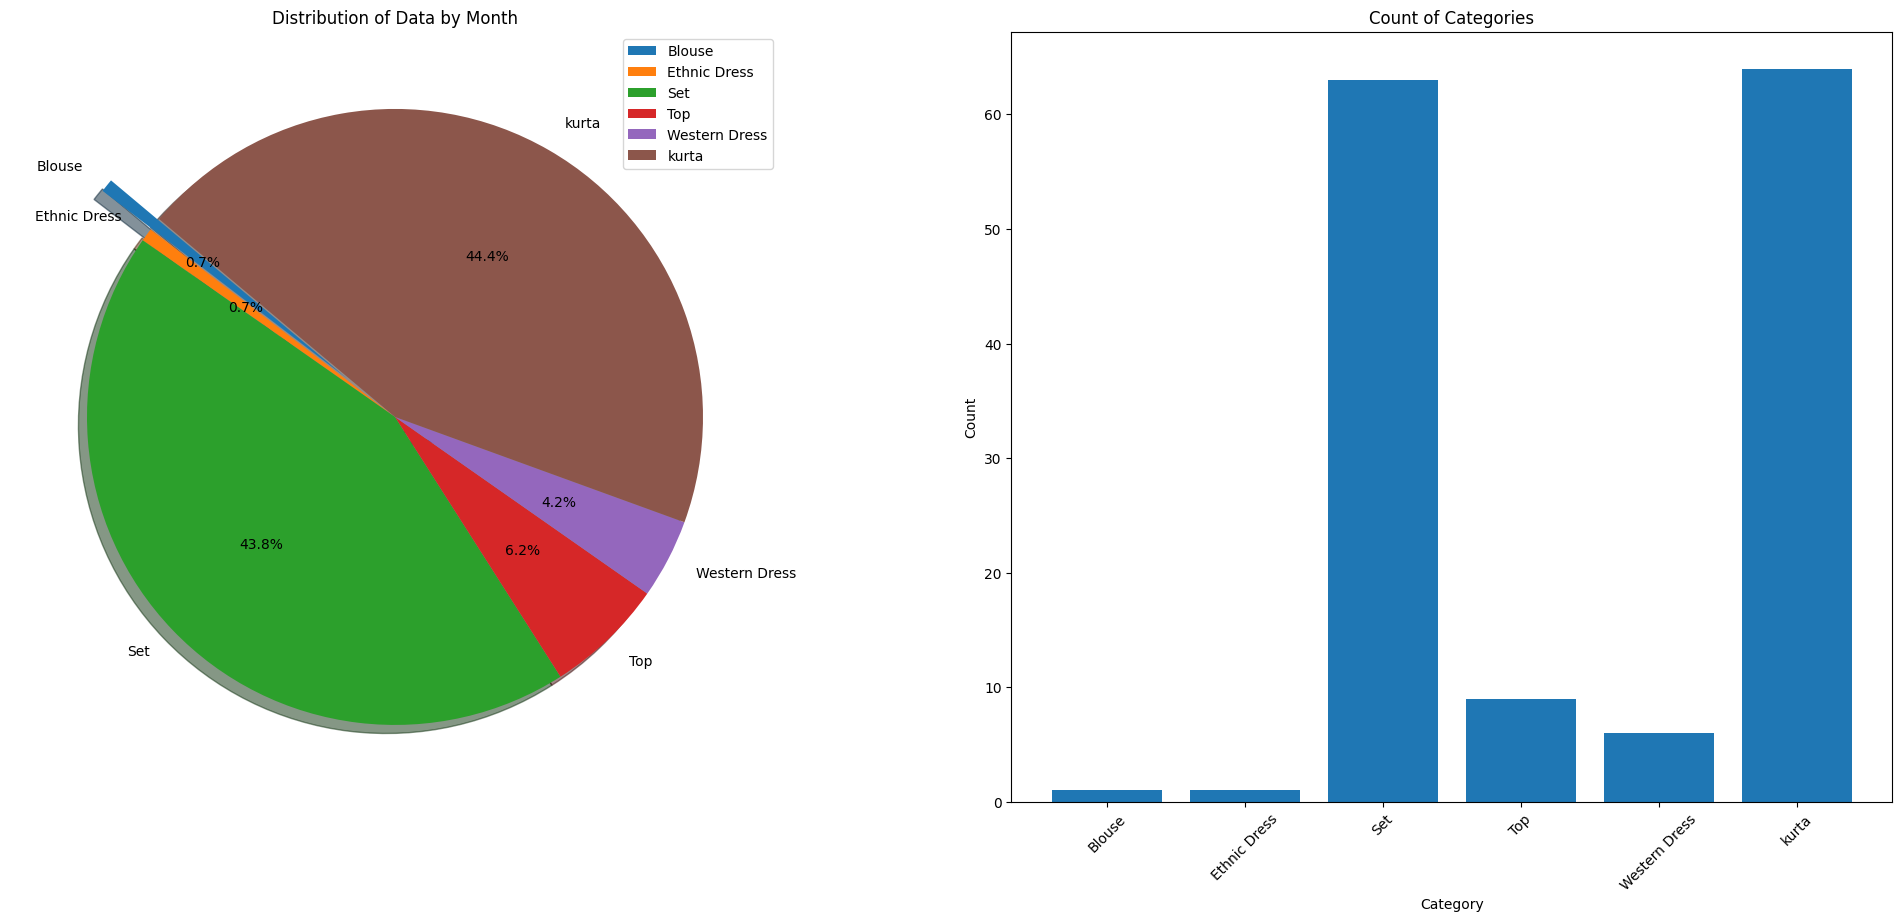

In [ ]:
month_3_data = data2[data2['month'] == 3]
month_3_data=month_3_data.drop('month', axis=1)
print(month_3_data)
pd.DataFrame(month_3_data)
# Plot the data
# Calculate the count of each category

# Plot the data

labels = month_3_data['Category']
sizes = month_3_data['count']
# Adjust the length of myexplode to match the number of categories
myexplode = [0.2, 0, 0, 0, 0, 0]  # Added two more zeros

plt.figure(figsize=(25, 10))
plt.subplot(1, 2, 1)
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140,explode = myexplode,shadow = True)
plt.title('Distribution of Data by Month')
plt.legend()
plt.subplot(1, 2, 2)
plt.bar(labels,sizes)
plt.title('Count of Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)

         Category  count
6          Blouse    363
7          Bottom    156
8    Ethnic Dress    294
9           Saree     53
10            Set  16967
11            Top   3460
12  Western Dress   3551
13          kurta  16185


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Blouse'),
  Text(1, 0, 'Bottom'),
  Text(2, 0, 'Ethnic Dress'),
  Text(3, 0, 'Saree'),
  Text(4, 0, 'Set'),
  Text(5, 0, 'Top'),
  Text(6, 0, 'Western Dress'),
  Text(7, 0, 'kurta')])

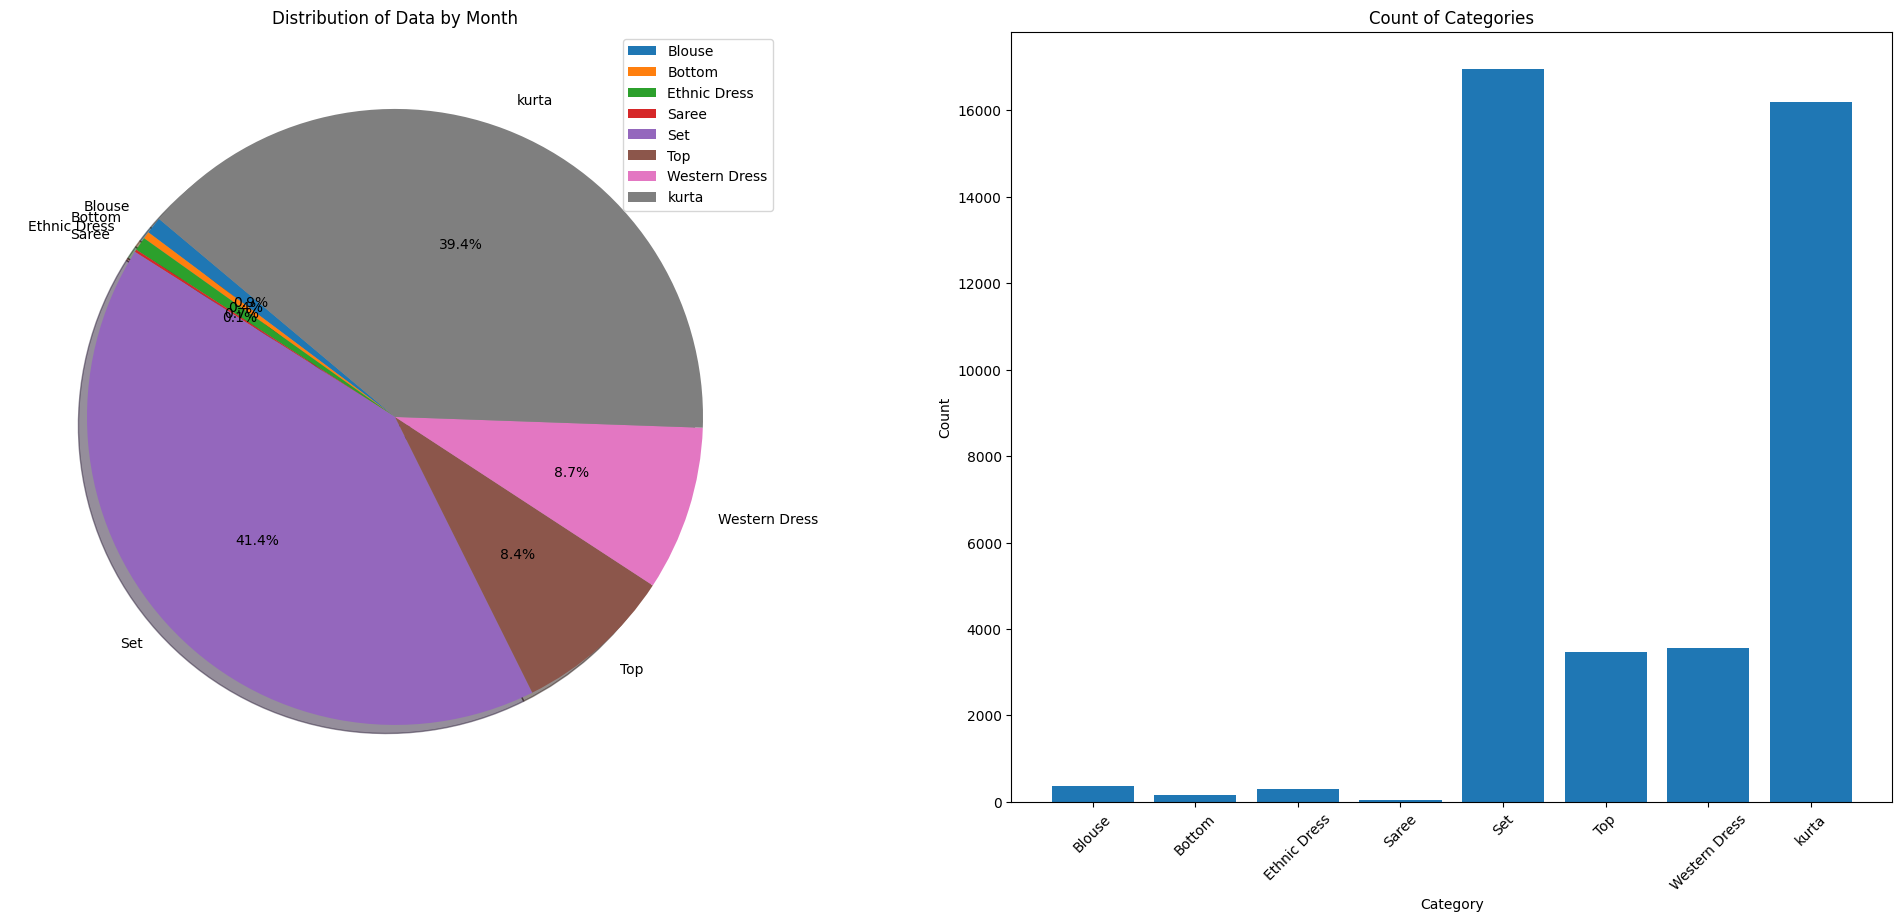

In [ ]:
month_4_data = data2[data2['month'] == 4]
month_4_data=month_4_data.drop('month', axis=1)
print(month_4_data)
pd.DataFrame(month_4_data)
# Plot the data
# Calculate the count of each category

# Plot the data

labels = month_4_data['Category']
sizes = month_4_data['count']
# Adjust the length of myexplode to match the number of categories

plt.figure(figsize=(25, 10))
plt.subplot(1, 2, 1)
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140,shadow = True)
plt.title('Distribution of Data by Month')
plt.legend(loc='upper right')
plt.subplot(1, 2, 2)
plt.bar(labels,sizes)
plt.title('Count of Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)

         Category  count
14         Blouse    278
15         Bottom    114
16   Ethnic Dress    376
17          Saree     45
18            Set  13439
19            Top   3522
20  Western Dress   5096
21          kurta  12408


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Blouse'),
  Text(1, 0, 'Bottom'),
  Text(2, 0, 'Ethnic Dress'),
  Text(3, 0, 'Saree'),
  Text(4, 0, 'Set'),
  Text(5, 0, 'Top'),
  Text(6, 0, 'Western Dress'),
  Text(7, 0, 'kurta')])

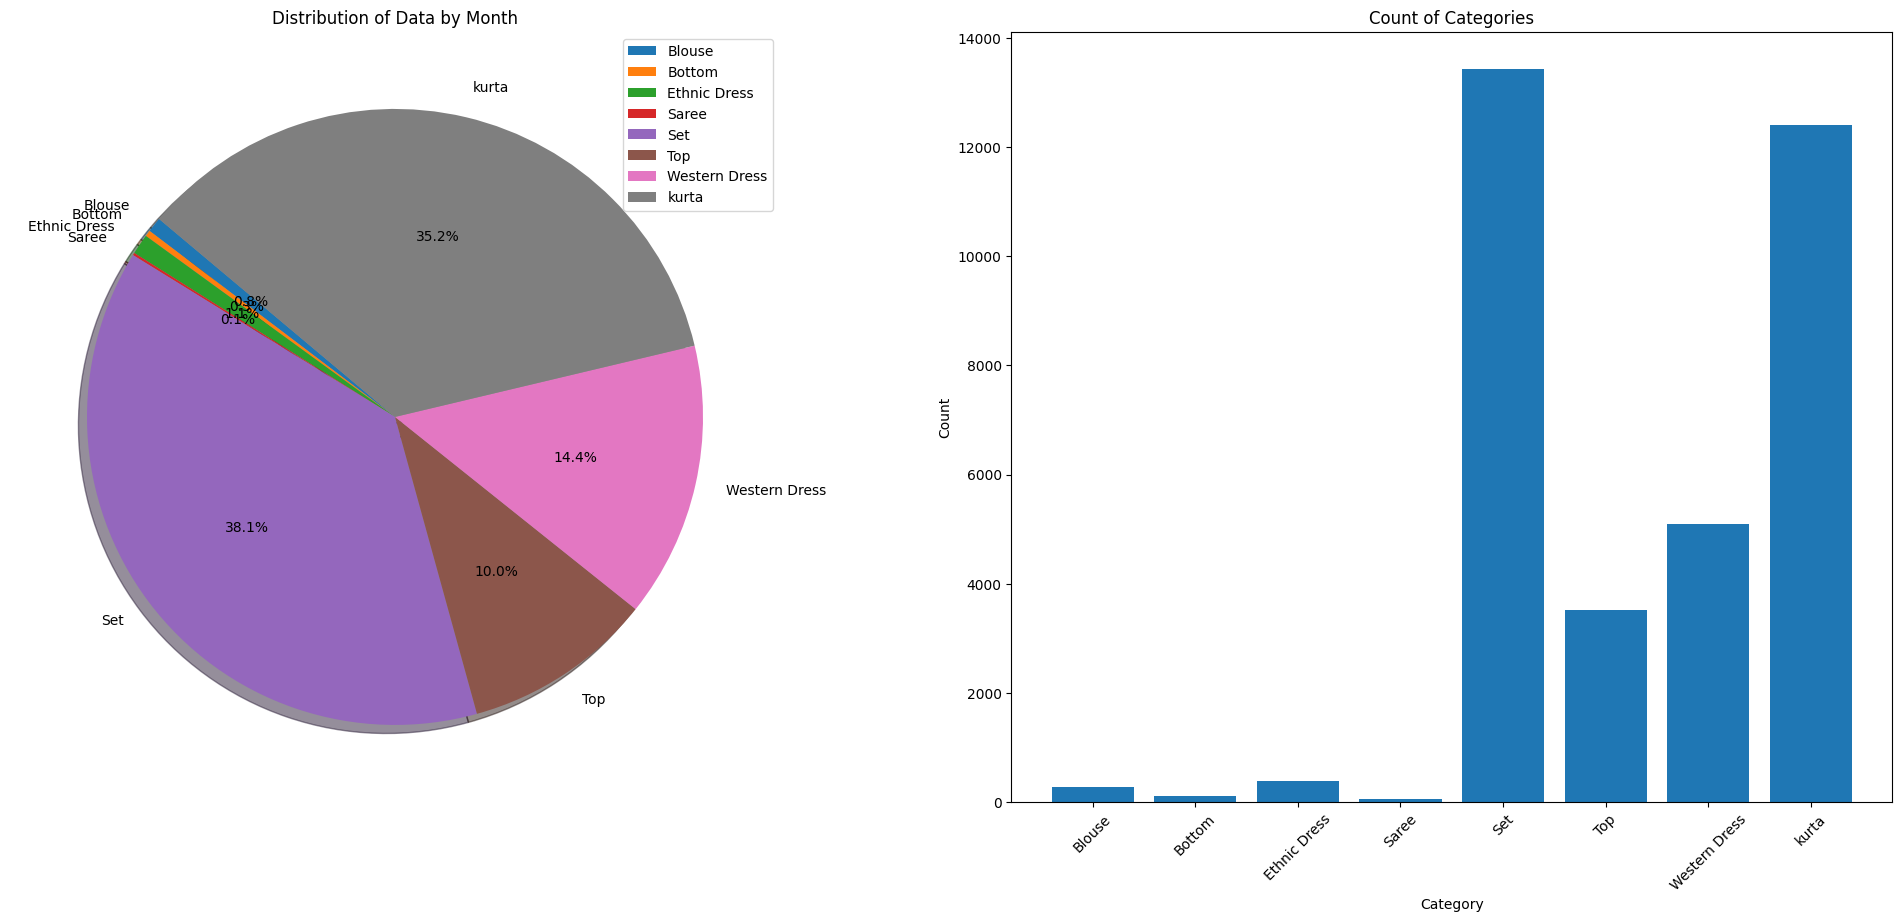

In [ ]:
month_5_data = data2[data2['month'] ==5]
month_5_data=month_5_data.drop('month', axis=1)
print(month_5_data)
pd.DataFrame(month_5_data)
# Plot the data
# Calculate the count of each category

# Plot the data

labels = month_5_data['Category']
sizes = month_5_data['count']
# Adjust the length of myexplode to match the number of categories

plt.figure(figsize=(25, 10))
plt.subplot(1, 2, 1)
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140,shadow = True)
plt.title('Distribution of Data by Month')
plt.legend()
plt.subplot(1, 2, 2)
plt.bar(labels,sizes)
plt.title('Count of Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)

         Category  count
22         Blouse    162
23         Bottom     94
24        Dupatta      1
25   Ethnic Dress    308
26          Saree     29
27            Set  11837
28            Top   2309
29  Western Dress   4527
30          kurta  12501


([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Blouse'),
  Text(1, 0, 'Bottom'),
  Text(2, 0, 'Dupatta'),
  Text(3, 0, 'Ethnic Dress'),
  Text(4, 0, 'Saree'),
  Text(5, 0, 'Set'),
  Text(6, 0, 'Top'),
  Text(7, 0, 'Western Dress'),
  Text(8, 0, 'kurta')])

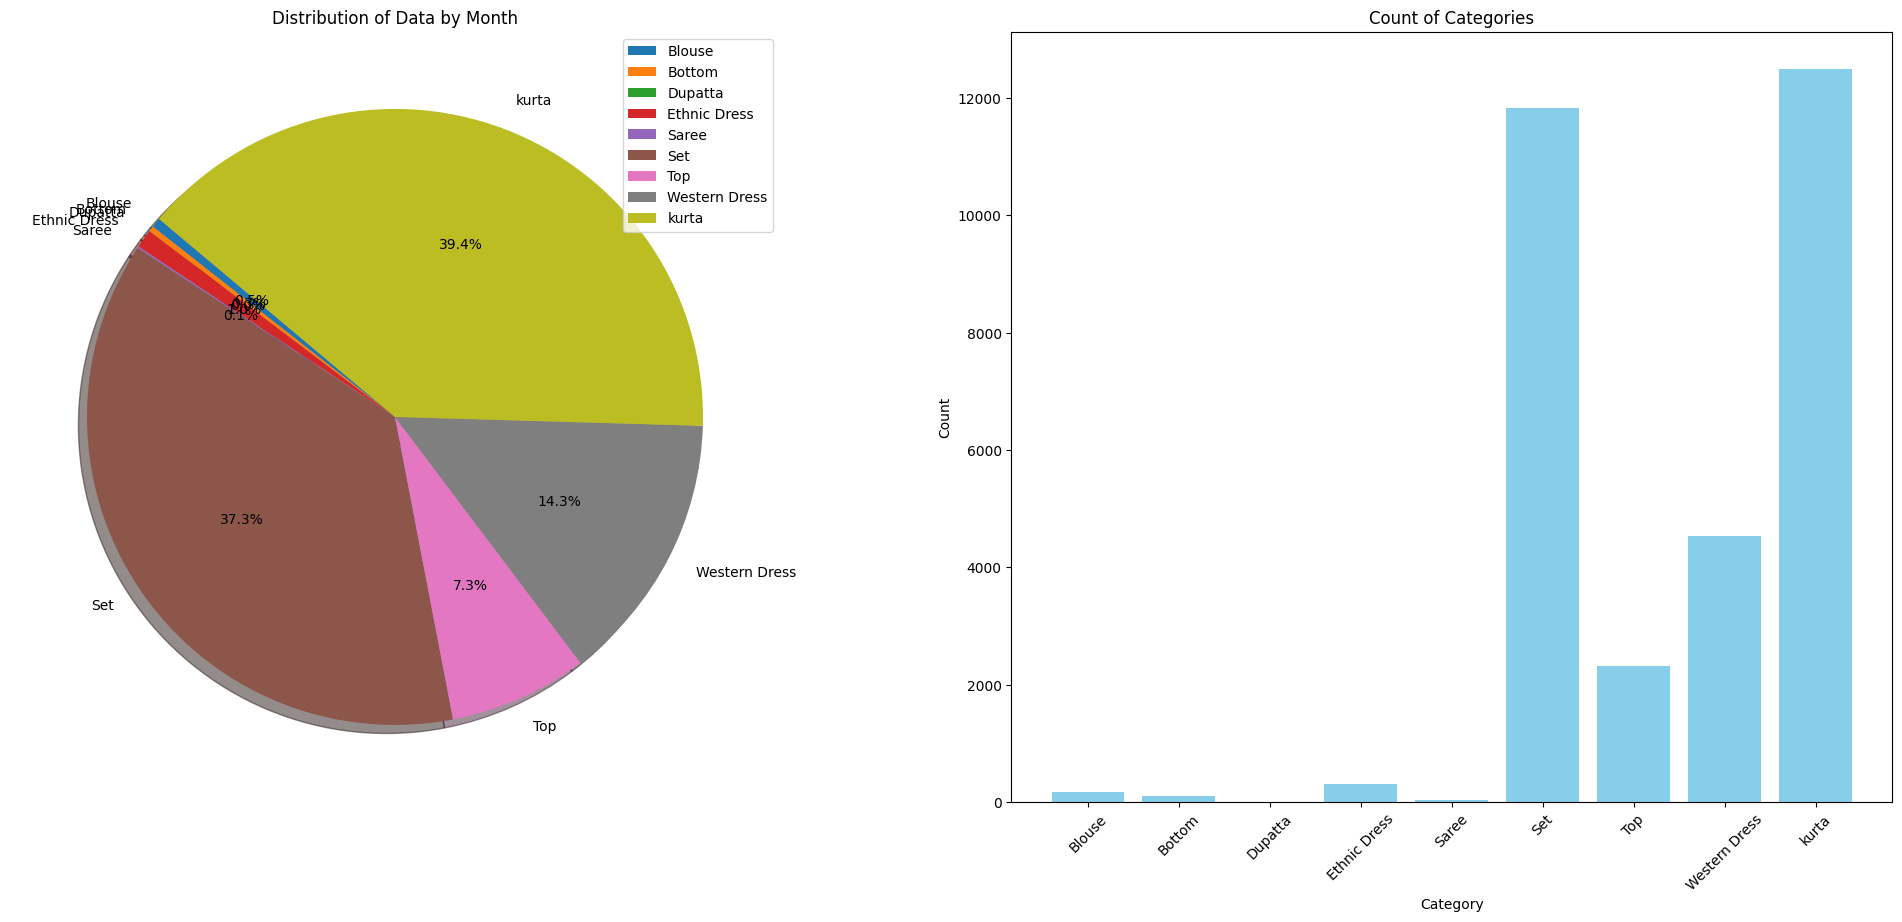

In [ ]:
month_6_data = data2[data2['month'] ==6]
month_6_data =month_6_data .drop('month', axis=1)
print(month_6_data )
pd.DataFrame(month_6_data )
# Plot the data
# Calculate the count of each category

# Plot the data

labels = month_6_data ['Category']
sizes = month_6_data ['count']
# Adjust the length of myexplode to match the number of categories

plt.figure(figsize=(25, 10))
plt.subplot(1, 2, 1)
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140,shadow = True)
plt.title('Distribution of Data by Month')
plt.legend()
plt.subplot(1, 2, 2)
plt.bar(labels,sizes, color='skyblue')
plt.title('Count of Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)

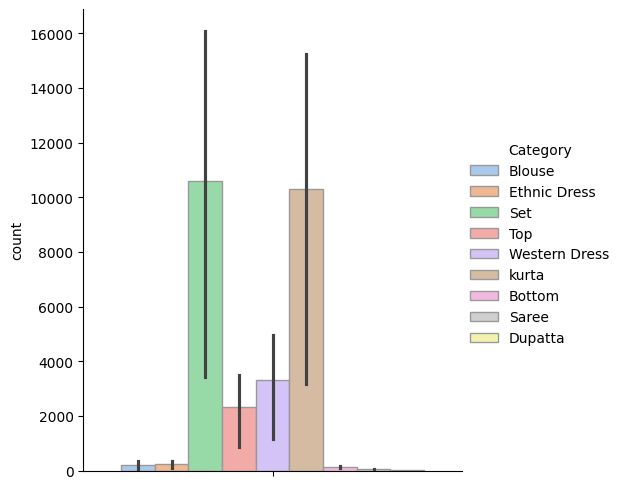

In [ ]:
sns.catplot(
    data=data2, y="count", hue="Category", kind="bar",
    palette="pastel", edgecolor=".6",
)

In [ ]:
df.head(1)


,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,month
index,,,,,,,,,,,,,,,,,,,,,
1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,INR,406.0,BENGALURU,KARNATAKA,560085.0,IN,False,4


In [ ]:
df['Status'].unique()

array(['Shipped - Delivered to Buyer', 'Shipped', 'Cancelled',
       'Shipped - Returned to Seller', 'Shipped - Rejected by Buyer',
       'Shipped - Lost in Transit', 'Shipped - Out for Delivery',
       'Shipped - Returning to Seller', 'Shipped - Picked Up', 'Pending',
       'Pending - Waiting for Pick Up', 'Shipped - Damaged'], dtype=object)

In [ ]:
df['Status'].value_counts()

Status
Shipped                          72653
Shipped - Delivered to Buyer     26555
Cancelled                         5223
Shipped - Returned to Seller      1847
Shipped - Picked Up                918
Pending                            583
Pending - Waiting for Pick Up      262
Shipped - Returning to Seller      130
Shipped - Out for Delivery          32
Shipped - Rejected by Buyer         11
Shipped - Lost in Transit            4
Shipped - Damaged                    1
Name: count, dtype: int64

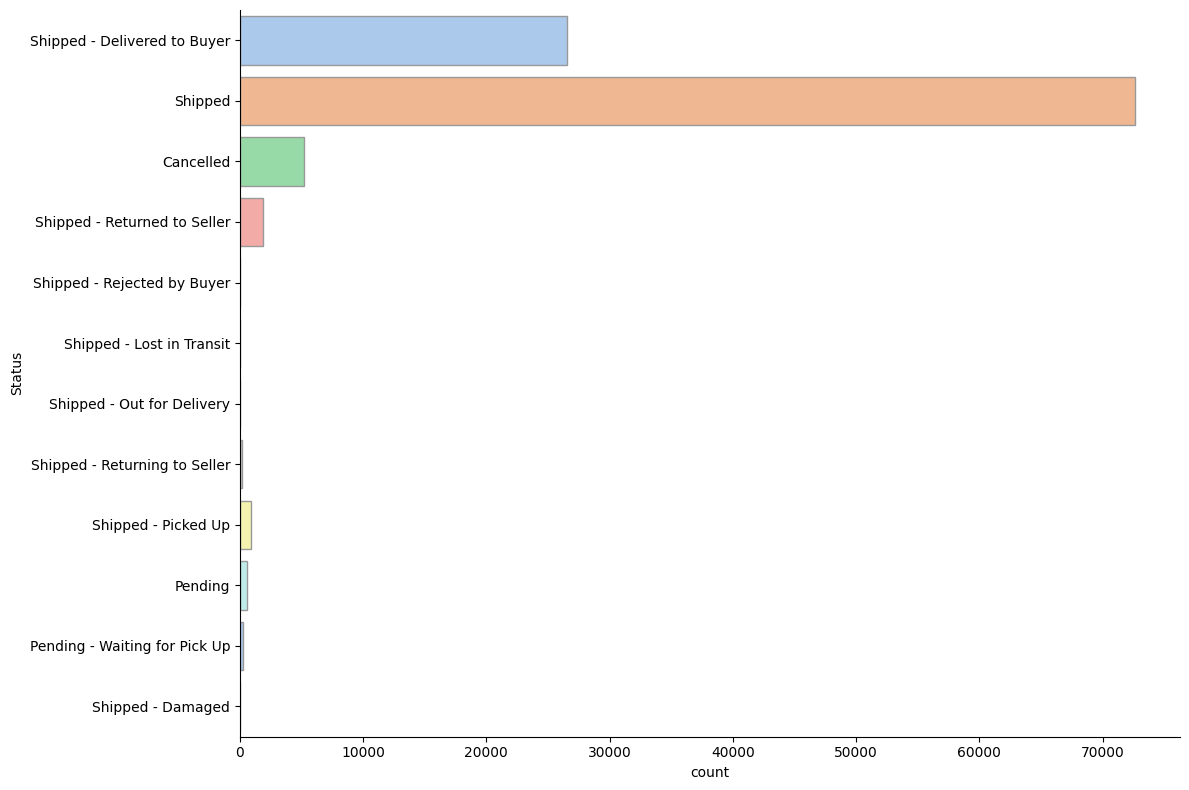

In [ ]:
sns.catplot(
    data=df, y='Status', hue="Status", kind="count",
    palette="pastel", edgecolor=".6",
    height=8, # Adjust the height of the plot
    aspect=1.5  # Adjust the aspect ratio (width/height)
)
plt.show()

In [ ]:
ee=df['month'].value_counts()
pd.DataFrame(ee)
ee = ee.reset_index()
t=ee['count'].sum()
ee
ee['probabilities'] = ee.apply(lambda row: row['count'] /t, axis=1)
ee

,month,count,probabilities
0,4,41029,0.379129
1,5,35278,0.325987
2,6,31768,0.293553
3,3,144,0.001331


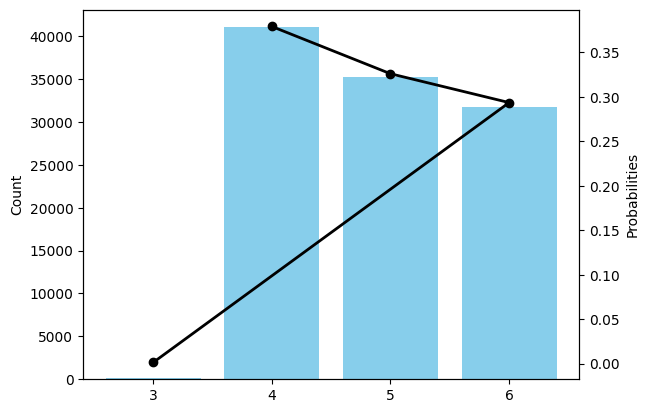

In [ ]:
plt.bar(ee['month'], ee['count'], color='skyblue')
plt.xticks(ee['month'])
plt.ylabel('Count')
plt.twinx()
plt.plot(ee['month'],ee['probabilities'], marker='o', color='black', linestyle='-', linewidth=2)
plt.ylabel('Probabilities')
plt.show()

In [ ]:
df['Status'].unique()

array(['Shipped - Delivered to Buyer', 'Shipped', 'Cancelled',
       'Shipped - Returned to Seller', 'Shipped - Rejected by Buyer',
       'Shipped - Lost in Transit', 'Shipped - Out for Delivery',
       'Shipped - Returning to Seller', 'Shipped - Picked Up', 'Pending',
       'Pending - Waiting for Pick Up', 'Shipped - Damaged'], dtype=object)

In [ ]:
result = df.groupby(['month', 'Status']).size().reset_index(name='count').reset_index(drop=True)

In [ ]:
result

,month,Status,count
0,3,Cancelled,4
1,3,Shipped,123
2,3,Shipped - Delivered to Buyer,16
3,3,Shipped - Returned to Seller,1
4,4,Cancelled,1979
5,4,Pending,1
6,4,Shipped,27101
7,4,Shipped - Delivered to Buyer,11087
8,4,Shipped - Lost in Transit,2
9,4,Shipped - Out for Delivery,1


In [ ]:
w=result[['month','count']]

                         Status  count
0                     Cancelled      4
1                       Shipped    123
2  Shipped - Delivered to Buyer     16
3  Shipped - Returned to Seller      1


([0, 1, 2, 3],
 [Text(0, 0, 'Cancelled'),
  Text(1, 0, 'Shipped'),
  Text(2, 0, 'Shipped - Delivered to Buyer'),
  Text(3, 0, 'Shipped - Returned to Seller')])

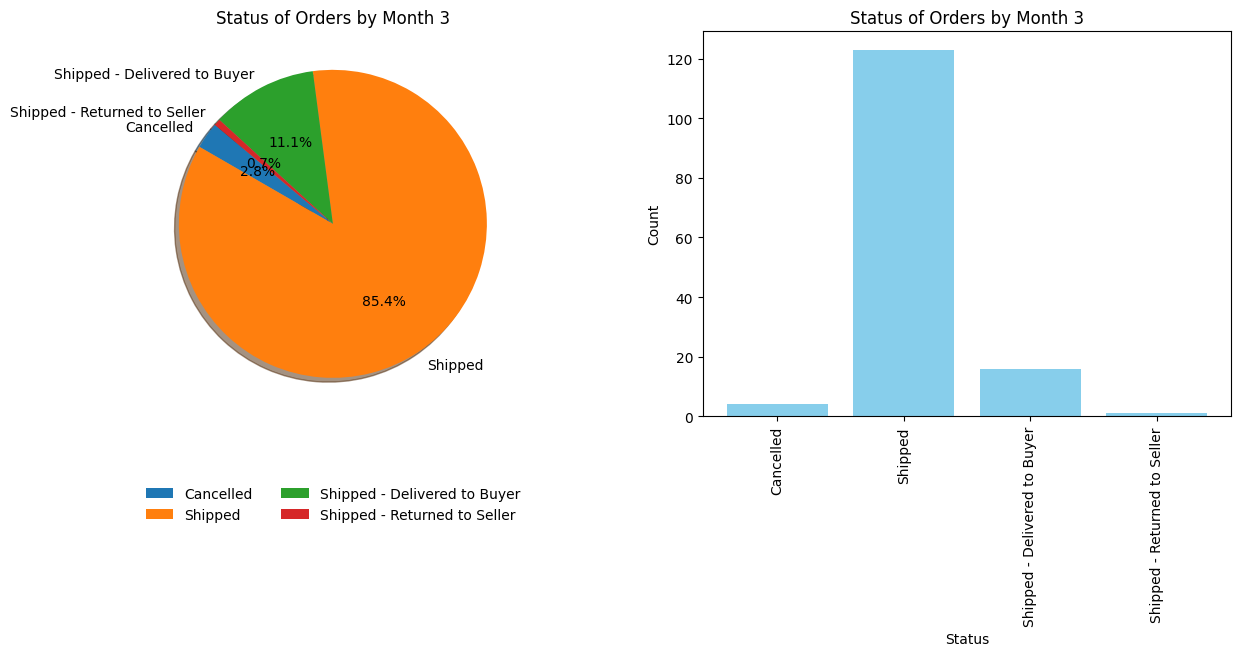

In [ ]:
month3 = result[result['month'] ==3]
month3 =month3 .drop('month', axis=1)
print(month3 )
pd.DataFrame(month3 )
# Plot the data
# Calculate the count of each category

# Plot the data

labels3 = month3 ['Status']
sizes3 = month3 ['count']
# Adjust the length of myexplode to match the number of categories

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.pie(sizes3, labels=labels3, autopct='%1.1f%%', startangle=140,shadow = True)
plt.title('Status of Orders by Month 3')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2, frameon=False)
plt.subplot(1, 2, 2)
plt.bar(labels3,sizes3, color='skyblue')
plt.title('Status of Orders by Month 3')
plt.xlabel('Status')
plt.ylabel('Count')
plt.xticks(rotation=90)

                           Status  count
4                       Cancelled   1979
5                         Pending      1
6                         Shipped  27101
7    Shipped - Delivered to Buyer  11087
8       Shipped - Lost in Transit      2
9      Shipped - Out for Delivery      1
10            Shipped - Picked Up      2
11    Shipped - Rejected by Buyer      6
12   Shipped - Returned to Seller    848
13  Shipped - Returning to Seller      2


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Cancelled'),
  Text(1, 0, 'Pending'),
  Text(2, 0, 'Shipped'),
  Text(3, 0, 'Shipped - Delivered to Buyer'),
  Text(4, 0, 'Shipped - Lost in Transit'),
  Text(5, 0, 'Shipped - Out for Delivery'),
  Text(6, 0, 'Shipped - Picked Up'),
  Text(7, 0, 'Shipped - Rejected by Buyer'),
  Text(8, 0, 'Shipped - Returned to Seller'),
  Text(9, 0, 'Shipped - Returning to Seller')])

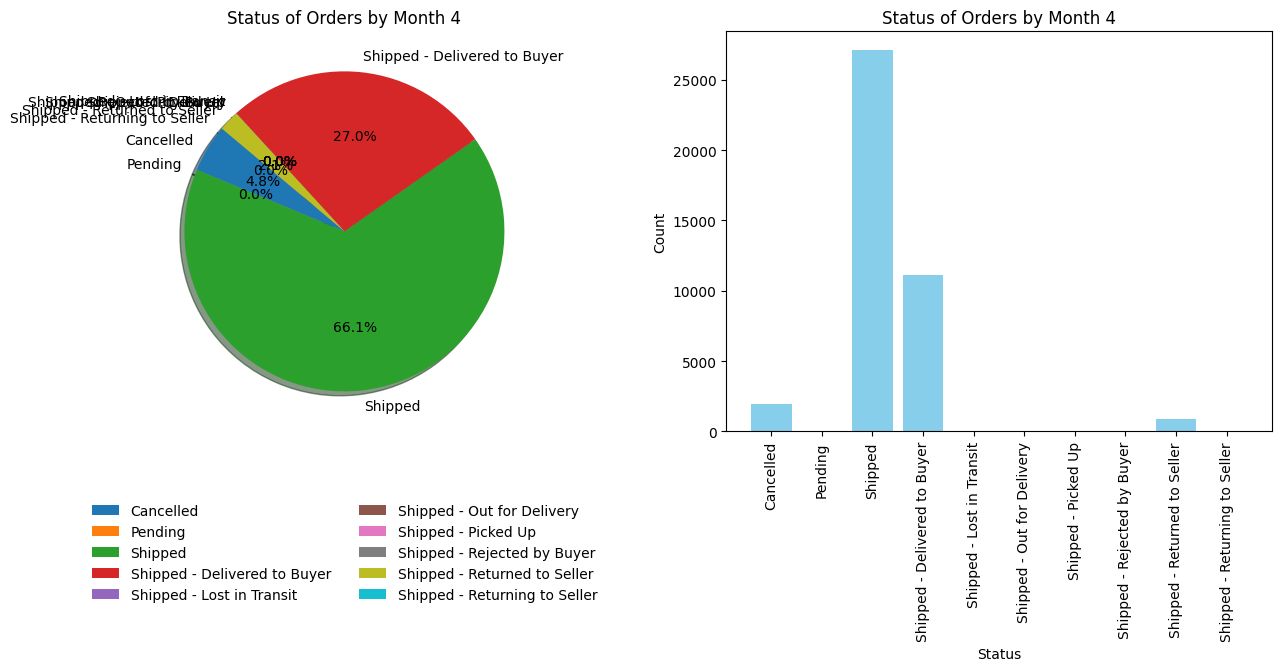

In [ ]:
month4 = result[result['month'] ==4]
month4 =month4.drop('month', axis=1)
print(month4)
pd.DataFrame(month4 )
# Plot the data
# Calculate the count of each category

# Plot the data

labels4 = month4 ['Status']
sizes4 = month4 ['count']
# Adjust the length of myexplode to match the number of categories

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.pie(sizes4, labels=labels4, autopct='%1.1f%%', startangle=140,shadow = True)
plt.title('Status of Orders by Month 4')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2, frameon=False)
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
plt.subplot(1, 2, 2)
plt.bar(labels4,sizes4, color='skyblue')
plt.title('Status of Orders by Month 4')
plt.xlabel('Status')
plt.ylabel('Count')
plt.xticks(rotation=90)

                           Status  count
14                      Cancelled   1607
15                        Pending      6
16                        Shipped  23444
17   Shipped - Delivered to Buyer   9546
18      Shipped - Lost in Transit      2
19     Shipped - Out for Delivery      1
20            Shipped - Picked Up      5
21   Shipped - Returned to Seller    658
22  Shipped - Returning to Seller      9


([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Cancelled'),
  Text(1, 0, 'Pending'),
  Text(2, 0, 'Shipped'),
  Text(3, 0, 'Shipped - Delivered to Buyer'),
  Text(4, 0, 'Shipped - Lost in Transit'),
  Text(5, 0, 'Shipped - Out for Delivery'),
  Text(6, 0, 'Shipped - Picked Up'),
  Text(7, 0, 'Shipped - Returned to Seller'),
  Text(8, 0, 'Shipped - Returning to Seller')])

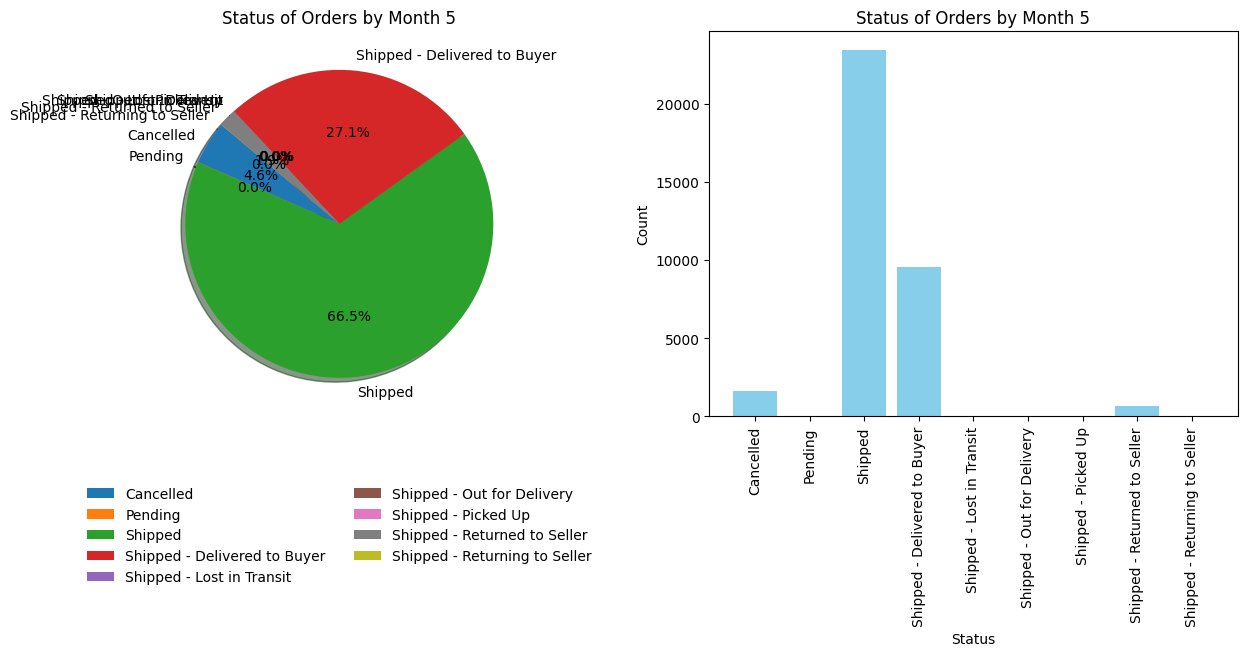

In [ ]:
month5 = result[result['month'] ==5]
month5 =month5 .drop('month', axis=1)
print(month5 )
pd.DataFrame(month5)
# Plot the data
# Calculate the count of each category

# Plot the data

labels5 = month5 ['Status']
sizes5 = month5 ['count']
# Adjust the length of myexplode to match the number of categories

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.pie(sizes5, labels=labels5, autopct='%1.1f%%', startangle=140,shadow = True)
plt.title('Status of Orders by Month 5')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2, frameon=False)
plt.subplot(1, 2, 2)
plt.bar(labels5,sizes5, color='skyblue')
plt.title('Status of Orders by Month 5')
plt.xlabel('Status')
plt.ylabel('Count')
plt.xticks(rotation=90)

                           Status  count
23                      Cancelled   1633
24                        Pending    576
25  Pending - Waiting for Pick Up    262
26                        Shipped  21985
27              Shipped - Damaged      1
28   Shipped - Delivered to Buyer   5906
29     Shipped - Out for Delivery     30
30            Shipped - Picked Up    911
31    Shipped - Rejected by Buyer      5
32   Shipped - Returned to Seller    340
33  Shipped - Returning to Seller    119


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'Cancelled'),
  Text(1, 0, 'Pending'),
  Text(2, 0, 'Pending - Waiting for Pick Up'),
  Text(3, 0, 'Shipped'),
  Text(4, 0, 'Shipped - Damaged'),
  Text(5, 0, 'Shipped - Delivered to Buyer'),
  Text(6, 0, 'Shipped - Out for Delivery'),
  Text(7, 0, 'Shipped - Picked Up'),
  Text(8, 0, 'Shipped - Rejected by Buyer'),
  Text(9, 0, 'Shipped - Returned to Seller'),
  Text(10, 0, 'Shipped - Returning to Seller')])

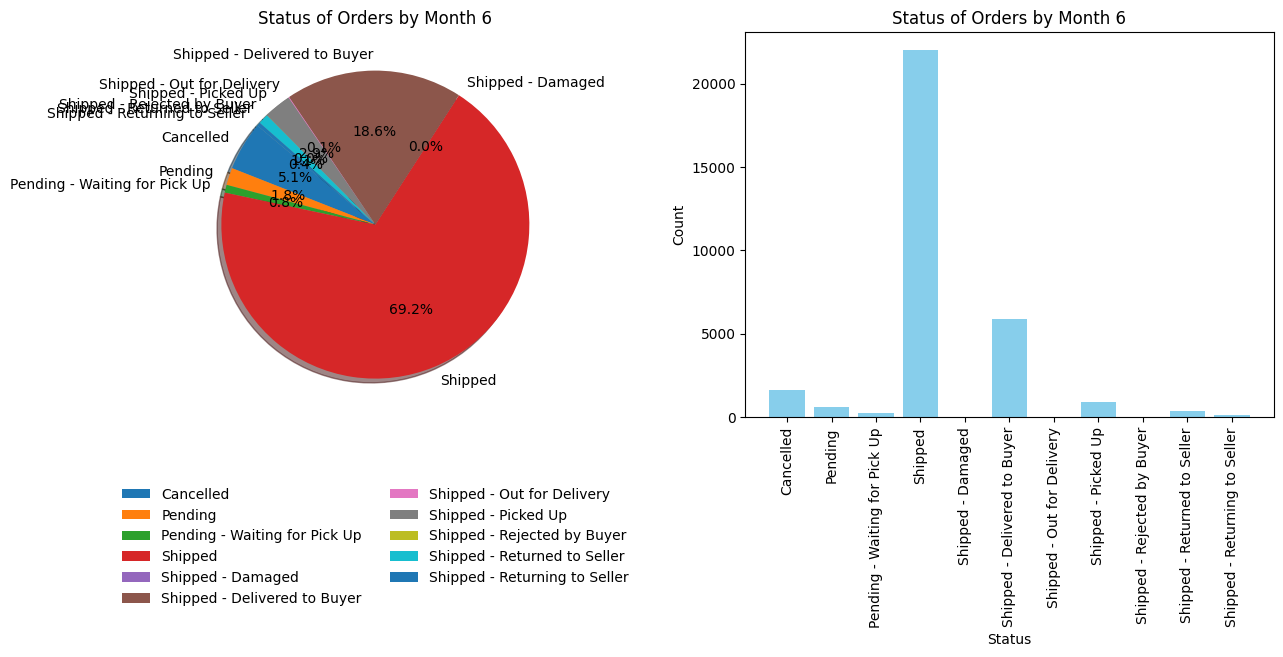

In [ ]:
month6 = result[result['month'] ==6]
month6 =month6 .drop('month', axis=1)
print(month6 )
pd.DataFrame(month6)
# Plot the data
# Calculate the count of each category

# Plot the data

labels6 = month6 ['Status']
sizes6 = month6 ['count']
# Adjust the length of myexplode to match the number of categories

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.pie(sizes6, labels=labels6, autopct='%1.1f%%', startangle=140,shadow = True)
plt.title('Status of Orders by Month 6')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2, frameon=False)
plt.subplot(1, 2, 2)
plt.bar(labels6,sizes6, color='skyblue')
plt.title('Status of Orders by Month 6')
plt.xlabel('Status')
plt.ylabel('Count')
plt.xticks(rotation=90)

In [ ]:
result[result['month'] ==3]

,month,Status,count
0,3,Cancelled,4
1,3,Shipped,123
2,3,Shipped - Delivered to Buyer,16
3,3,Shipped - Returned to Seller,1


In [ ]:
df['month'].value_counts()

month
4    41029
5    35278
6    31768
3      144
Name: count, dtype: int64

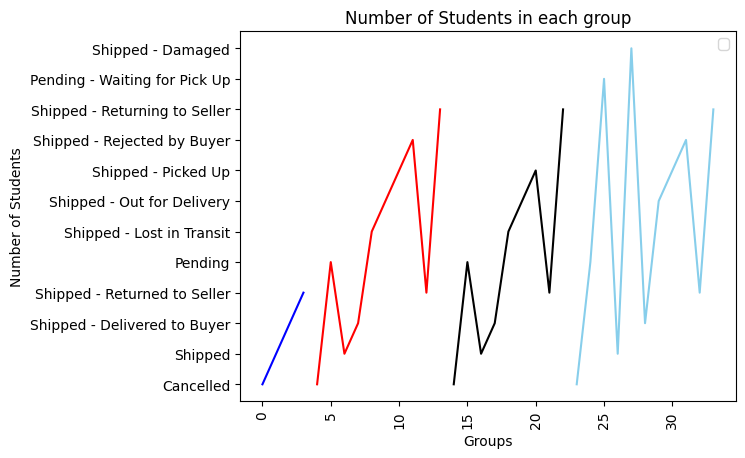

In [ ]:
import matplotlib.pyplot as plt
import numpy as np # Import numpy for numerical operations

# Assuming 'result' is your DataFrame and you want to plot months 3 and 4

# Replace 'Zboys' with the appropriate data for month 4 if needed
plt.plot(labels3, color='blue')
plt.plot(labels4, color='red')
plt.plot(labels5, color='black')
plt.plot(labels6, color='skyblue')
plt.title('Status of Orders by Month')
#plt.xticks(X_axis, X)
plt.xlabel("Groups")
plt.ylabel("Number of Students")
plt.title("Number of Students in each group")
plt.legend()
plt.xticks(rotation=90)
plt.show()

In [ ]:
df.head(1)

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,month
index,,,,,,,,,,,,,,,,,,,,,
1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,INR,406.0,BENGALURU,KARNATAKA,560085.0,IN,False,4


In [ ]:
df['ship-city'].unique()

array(['BENGALURU', 'NAVI MUMBAI', 'CHENNAI', ...,
       'GULABPURA, Distt BHILWARA', 'Prayagraj (ALLAHABAD)', 'Halol'],
      dtype=object)

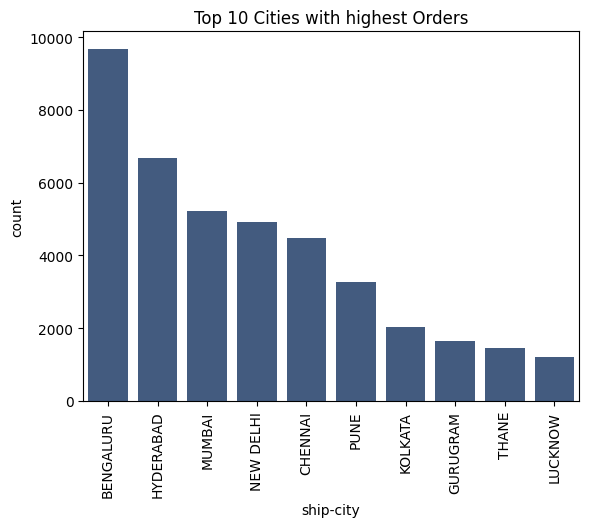

In [ ]:
# ... (Your existing code)

lables = df['ship-city'].value_counts().sort_values(ascending=False).head(10)
lables2 = df['ship-city'].unique()
order = lables.index

# Use a single color for all bars, or a list of colors with length matching the number of bars
# Example with a single color:
sns.countplot(x=df['ship-city'], alpha=0.8, order=order,palette=colors)

# Example with multiple colors (ensure the number of colors matches the number of bars):
cmap = plt.cm.Reds  # Choose a colormap (e.g., Reds)
colors = cmap(np.linspace(2, 1, len(order)))
# sns.countplot(x=df['ship-city'], alpha=0.8, order=order, palette=colors)

plt.title("Top 10 Cities with highest Orders")
plt.xticks(rotation=90)
plt.show()

In [ ]:
full=pd.concat([df, ds_null_currency], axis=0)

In [ ]:
full

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,month
index,,,,,,,,,,,,,,,,,,,,,
1,171-9198151-1101146,2022-04-30 00:00:00,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,INR,406.0,BENGALURU,KARNATAKA,560085.0,IN,False,4.0
2,404-0687676-7273146,2022-04-30 00:00:00,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,INR,329.0,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,4.0
4,407-1069790-7240320,2022-04-30 00:00:00,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,INR,574.0,CHENNAI,TAMIL NADU,600073.0,IN,False,4.0
5,404-1490984-4578765,2022-04-30 00:00:00,Shipped,Amazon,Amazon.in,Expedited,SET264,SET264-KR-NP-XL,Set,XL,B08YN7XDSG,Shipped,1,INR,824.0,GHAZIABAD,UTTAR PRADESH,201102.0,IN,False,4.0
6,408-5748499-6859555,2022-04-30 00:00:00,Shipped,Amazon,Amazon.in,Expedited,J0095,J0095-SET-L,Set,L,B08CMHNWBN,Shipped,1,INR,653.0,CHANDIGARH,CHANDIGARH,160036.0,IN,False,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128902,406-4220789-1106743,5/31/2022,Cancelled,Amazon,Amazon.in,Expedited,JNE3798,JNE3798-KR-L,Western Dress,L,B09SDX13G7,Cancelled,0,NaN,NaN,ANANTAPUR,ANDHRA PRADESH,515001.0,IN,False,NaN
128903,406-3923120-4345139,5/31/2022,Cancelled,Amazon,Amazon.in,Expedited,JNE3801,JNE3801-KR-M,kurta,M,B09SDZ4FH9,Cancelled,0,NaN,NaN,ANANTAPUR,ANDHRA PRADESH,515001.0,IN,False,NaN
128907,403-6757403-6097100,5/31/2022,Cancelled,Amazon,Amazon.in,Expedited,NW014,NW014-ST-SR-XXXL,Set,3XL,B0928ZT74Y,Cancelled,0,NaN,NaN,GREATER NOIDA,UTTAR PRADESH,201306.0,IN,False,NaN


In [ ]:
full['Courier Status'].value_counts()

Courier Status
Shipped      102157
Unshipped      6186
Cancelled      5624
Name: count, dtype: int64

([0, 1, 2],
 [Text(0, 0, 'Shipped'), Text(1, 0, 'Unshipped'), Text(2, 0, 'Cancelled')])

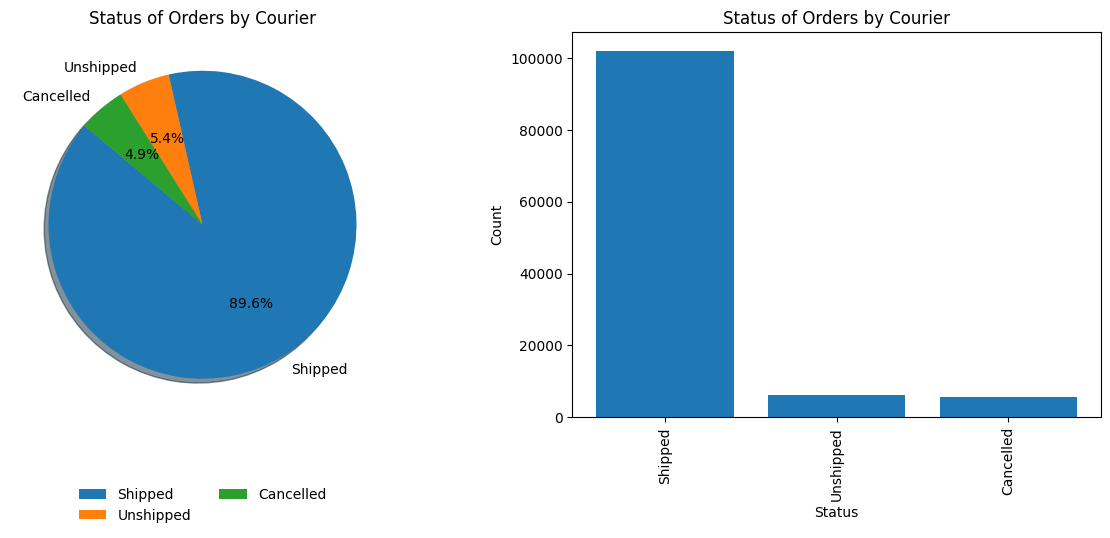

In [ ]:
# ... (Your existing code)

labels = full['Courier Status'].value_counts().index # Get labels from the 'Courier Status' column
sizes = full['Courier Status'].value_counts().values # Get corresponding counts for each label

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140,shadow = True) # Now labels and sizes have the same length
plt.title('Status of Orders by Courier') # Update title to reflect the data being plotted
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2, frameon=False)
plt.subplot(1, 2, 2)
plt.bar(labels,sizes)
plt.title('Status of Orders by Courier') # Update title to reflect the data being plotted
plt.xlabel('Status')
plt.ylabel('Count')
plt.xticks(rotation=90)

In [ ]:
df['Order ID'].duplicated().sum()

0

In [ ]:
products2=df.groupby(by='Order ID')['Amount'].mean().nlargest(10)
products2

Order ID
403-4106553-1691525    5495.0
406-7195963-2374765    3036.0
404-4712917-7300332    2894.0
408-9885439-6698733    2864.0
408-3363121-6123562    2860.0
405-6877720-7865168    2796.0
408-9361250-7029128    2698.0
402-9141667-1791537    2676.0
403-0343365-3075550    2664.0
171-9419863-7830701    2655.0
Name: Amount, dtype: float64

In [ ]:
products2 = df[['Order ID', 'Amount']].groupby('Order ID').mean().nlargest(10, 'Amount')
products2

,Amount
Order ID,
403-4106553-1691525,5495.0
406-7195963-2374765,3036.0
404-4712917-7300332,2894.0
408-9885439-6698733,2864.0
408-3363121-6123562,2860.0
405-6877720-7865168,2796.0
408-9361250-7029128,2698.0
402-9141667-1791537,2676.0
403-0343365-3075550,2664.0


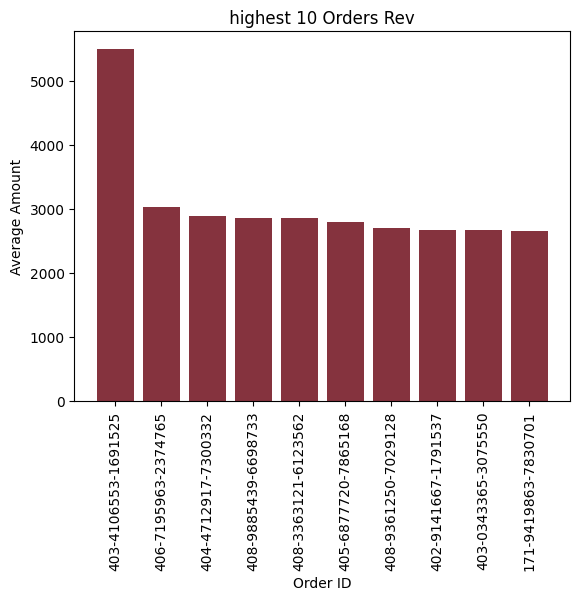

In [ ]:
#products2 = df.groupby(by='Order ID')['Amount'].nlargest(10)

# Extract Order IDs and average amounts
order_ids = products2.index
avg_amounts = products2.Amount

# Use a single color for all bars
plt.bar(x=order_ids, height=avg_amounts, alpha=0.8, color=colors[0])  # Use the first color from your colors array

plt.title(" highest 10 Orders Rev ")
plt.xlabel("Order ID")
plt.ylabel("Average Amount")
plt.xticks(rotation=90)
plt.show()

In [ ]:
products=df.groupby(by='SKU')['Amount'].sum().nlargest(10)
products

SKU
J0230-SKD-M        508994.0
JNE3797-KR-L       459607.0
J0230-SKD-S        459237.0
JNE3797-KR-M       388906.0
JNE3797-KR-S       358181.0
JNE3797-KR-XL      295881.0
J0230-SKD-L        291305.0
JNE3797-KR-XS      276922.0
SET268-KR-NP-XL    271008.0
SET268-KR-NP-S     252884.0
Name: Amount, dtype: float64

In [ ]:
df['Qty'].unique()

array([1, 2, 3, 5, 4])

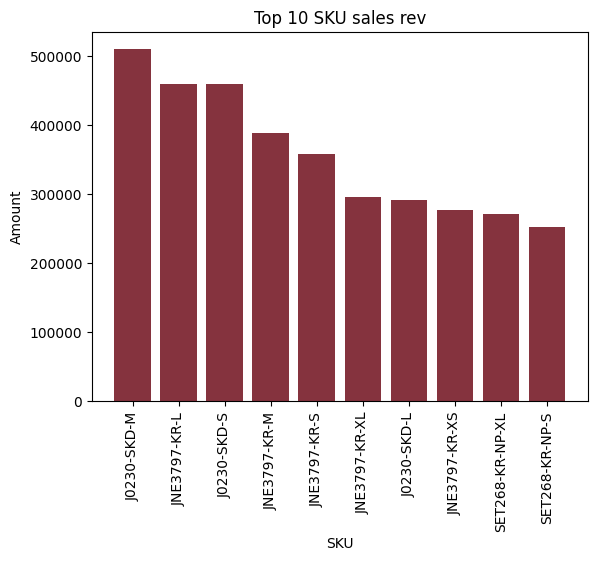

In [ ]:


# Extract Order IDs and average amounts
SKU = products.index
Amount = products.values

# Use a single color for all bars
plt.bar(x=SKU, height=Amount, alpha=0.8, color=colors[0])  # Use the first color from your colors array

plt.title("Top 10 SKU sales rev")
plt.xlabel("SKU")
plt.ylabel("Amount")
plt.xticks(rotation=90)
plt.show()

In [ ]:
qt=df.groupby(by='SKU')['Qty'].sum().nlargest(10)
qt

SKU
JNE3797-KR-L       633
JNE3797-KR-M       535
JNE3797-KR-S       486
JNE3405-KR-L       465
J0230-SKD-M        458
J0230-SKD-S        411
JNE3797-KR-XL      398
JNE3405-KR-S       391
JNE3797-KR-XS      374
SET268-KR-NP-XL    356
Name: Qty, dtype: int64

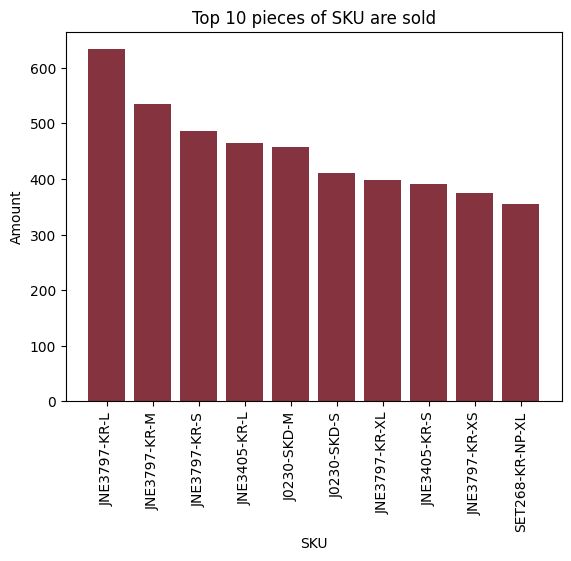

In [ ]:
SKU = qt.index
qty = qt.values

# Use a single color for all bars
plt.bar(x=SKU, height=qty, alpha=0.8, color=colors[0])  # Use the first color from your colors array

plt.title("Top 10 pieces of SKU are sold")
plt.xlabel("SKU")
plt.ylabel("Amount")
plt.xticks(rotation=90)
plt.show()

In [ ]:
df=df.drop(['month'], axis=1)

In [ ]:
df['Order ID'].isnull().sum()

0

In [ ]:
df['Sales Channel '].unique()

array(['Amazon.in'], dtype=object)

In [ ]:


df['Qty'].sum()

108583

In [ ]:
df['Order ID'].count()

108219

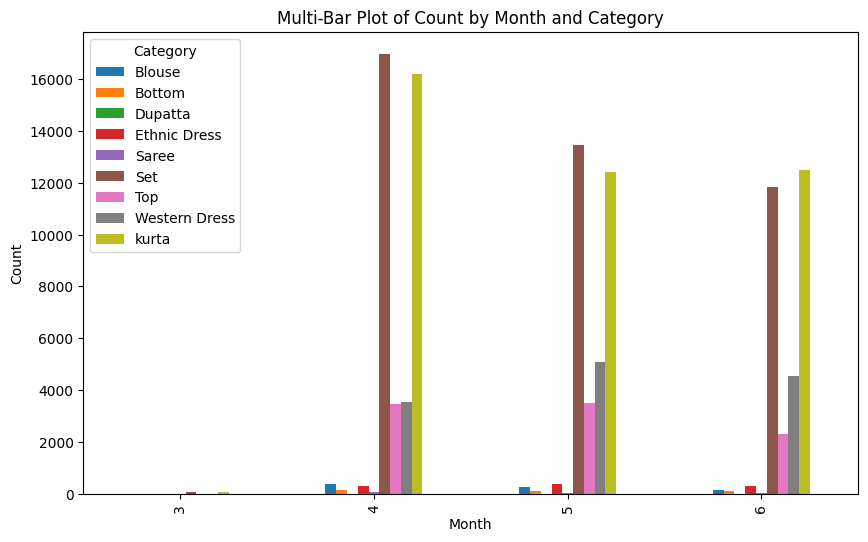

In [ ]:
df_pivot =data2 .pivot(index='month', columns='Category', values='count')

df_pivot.plot(kind='bar', figsize=(10, 6))
plt.title('Multi-Bar Plot of Count by Month and Category')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend(title='Category')
plt.show()

In [ ]:
df_pivot

Category,Blouse,Bottom,Dupatta,Ethnic Dress,Saree,Set,Top,Western Dress,kurta
month,,,,,,,,,
3,1.0,NaN,NaN,1.0,NaN,63.0,9.0,6.0,64.0
4,363.0,156.0,NaN,294.0,53.0,16967.0,3460.0,3551.0,16185.0
5,278.0,114.0,NaN,376.0,45.0,13439.0,3522.0,5096.0,12408.0
6,162.0,94.0,1.0,308.0,29.0,11837.0,2309.0,4527.0,12501.0
